In [1]:
!pip install numpy pandas scikit-learn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [3]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
class RandomForestRegressorFromScratch:
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        X = np.array(X)
        y = np.array(y)

        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [6]:
model = RandomForestRegressorFromScratch(n_estimators=100, max_depth=5, max_features='sqrt')
model.fit(X_train.values, y_train.values)

In [7]:
y_pred = model.predict(X_test.values)
y_pred[:10]

array([0.05020833, 0.11056548, 1.57772222, 0.19616071, 1.04888889,
       0.05056548, 1.00972222, 1.98      , 0.93522222, 1.4       ])

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.03853739224326588


In [9]:
importances = np.zeros(X_train.shape[1])
for tree in model.trees:
    importances += tree.feature_importances_
importances /= model.n_estimators

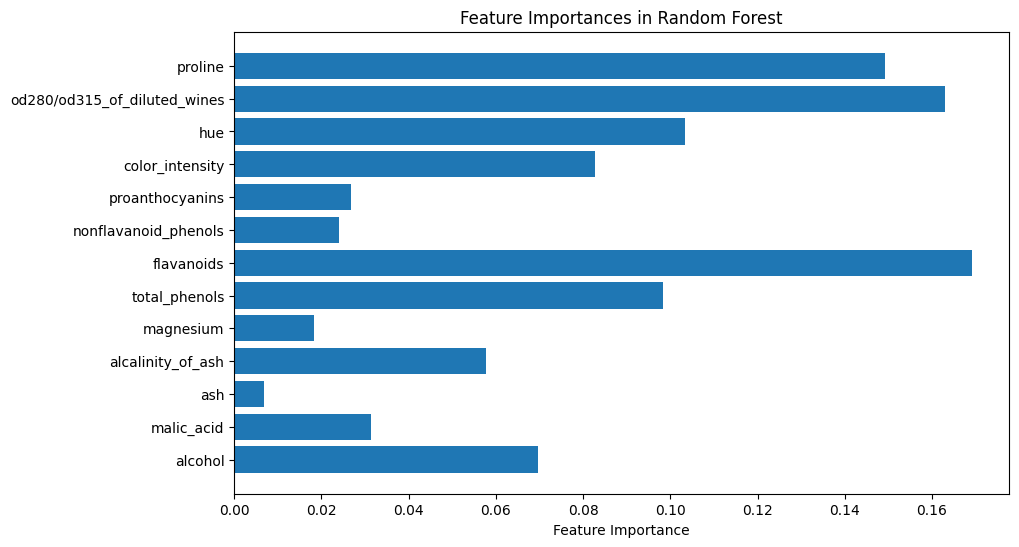

In [10]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.show()